In [1]:
import rir_generator as RG
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import wavio
import IPython 
from scipy.io.wavfile import write, read

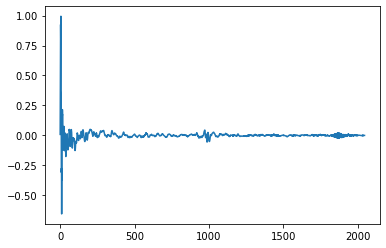

In [2]:
rate, file = read("Allure_90s_Cali_V30.wav")

impedance = file.astype(dtype=np.float32, order='C') / 2147483647
plt.plot(impedance)
plt.show()
# np.savetxt('impedance.dat', [impedance], delimiter=',\n', fmt='%.24f')

In [3]:
frameSize = 2048
stepSize = 128

In [4]:
def PreProcessData(xn, frameSize, stepSize):
    padding = len(xn) % stepSize
    if(padding == 0):
        temp = xn
    else:
        temp = np.append(xn, np.zeros(stepSize - padding))
    
    data = np.append(np.zeros(frameSize), temp)

    iteration = (len(data) // stepSize) - (frameSize // stepSize) + 1
    
    dataSet = np.zeros([iteration, frameSize])
    
    for i in range(iteration):
        start = i * stepSize
        end = start + frameSize
        dataSet[i] = data[start:end]
        
    return dataSet, data, len(data), iteration

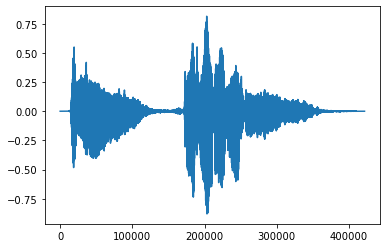

In [5]:
file = wavio.read("被遺忘的時光intro.wav")
fixed_data0 = file.data[:, 0]
fixed_data1 = file.data[:, 1]

float_data0 = fixed_data0.astype(np.float32, order='C') / 32767.0
float_data1 = fixed_data1.astype(np.float32, order='C') / 32767.0

dataSet, data0, length, iteration = PreProcessData(float_data0, frameSize, stepSize)
dataSet, data1, length, iteration = PreProcessData(float_data1, frameSize, stepSize)

plt.plot(data0)
plt.show()

IPython.display.display(IPython.display.Audio("被遺忘的時光intro.wav", rate = file.rate))

In [6]:
Hn = np.fft.fft(impedance)
output = np.zeros(length)

for index in range(iteration):
    Xn = np.fft.fft(dataSet[index])
    Yn = np.multiply(Xn, Hn)

    yn = np.fft.ifft(Yn).real
    
    start = index * stepSize
    end = start + stepSize
    
    output[start : end] = yn[-stepSize:] * 0.25

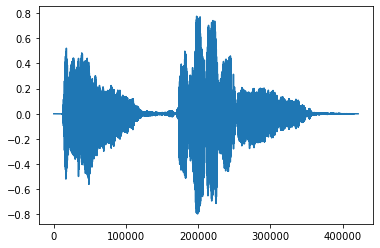

In [7]:
plt.plot(output)
plt.show()

In [8]:
write("output.wav", rate, (output * 32767.0).astype(np.int16))
IPython.display.display(IPython.display.Audio("output.wav", rate=rate))